In [1]:
import numpy as np
import os
import tensorflow as tf
from keras.datasets import mnist

import autokeras as ak
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from IPython.display import Image as IPImage, display  # for displaying images in Jupyter


# File paths for the Fake and Real image directories
fake_dir = '/home/michael/Documenti/Milinda_Githubproject/CIFAKE/Fake/'
real_dir = '/home/michael/Documenti/Milinda_Githubproject/CIFAKE/Real/'

# Prepare the data
def prepare_data(fake_dir, real_dir, img_size=(128, 128)):
    images = []
    image_paths = []
    labels = []

    # Fake images
    for img_name in os.listdir(fake_dir):
        if img_name.endswith(('.png', '.jpg', '.jpeg', '.gif')):
            img_path = os.path.join(fake_dir, img_name)
            img = image.load_img(img_path, target_size=img_size)
            img = image.img_to_array(img)
            img /= 255.0  # Normalize the images
            images.append(img)
            labels.append(0)  # Fake = 0
            image_paths.append(img_path)

    # Real images
    for img_name in os.listdir(real_dir):
        if img_name.endswith(('.png', '.jpg', '.jpeg', '.gif')):
            img_path = os.path.join(real_dir, img_name)
            img = image.load_img(img_path, target_size=img_size)
            img = image.img_to_array(img)
            img /= 255.0  # Normalize the images
            images.append(img)
            labels.append(1)  # Real = 1
            image_paths.append(img_path)

    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels, image_paths

# Load and prepare the data
x_data, y_data, image_paths = prepare_data(fake_dir, real_dir)

# Split the data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test, image_paths_train, image_paths_test = train_test_split(x_data, y_data, image_paths, test_size=0.2, random_state=42)

# Initialize the AutoKeras ImageClassifier
clf = ak.ImageClassifier(overwrite=True, max_trials=3)  # max_trials sets the number of models to try

# Train the classifier
clf.fit(x_train, y_train, epochs=5) # Increase epochs to train longer if needed




Trial 3 Complete [02h 13m 54s]
val_loss: 0.2287062555551529

Best val_loss So Far: 0.2287062555551529
Total elapsed time: 02h 51m 16s
Epoch 1/5
502/502 [==============================] - 1920s 4s/step - loss: 0.3087 - accuracy: 0.8686
Epoch 2/5
502/502 [==============================] - 1893s 4s/step - loss: 0.1678 - accuracy: 0.9353
Epoch 3/5
502/502 [==============================] - 1892s 4s/step - loss: 0.1175 - accuracy: 0.9559
Epoch 4/5
502/502 [==============================] - 1893s 4s/step - loss: 0.0844 - accuracy: 0.9685
Epoch 5/5
502/502 [==============================] - 1899s 4s/step - loss: 0.0583 - accuracy: 0.9798
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


In [2]:
# Evaluate the classifier
test_loss, test_acc = clf.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
# Evaluate the model on the test data
test_loss, test_acc = clf.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")

# Predict with the best model
y_pred = clf.predict(x_test)
print(f"Predicted labels: {y_pred[:5].flatten()}")
print(f"True labels: {y_test[:5]}")

126/126 [==============================] - 103s 802ms/step - loss: 0.3240 - accuracy: 0.8891
Test accuracy: 0.8891380429267883
126/126 [==============================] - 104s 817ms/step - loss: 0.3240 - accuracy: 0.8891
Test Accuracy: 0.889
126/126 [==============================] - 101s 804ms/step
Predicted labels: [1. 1. 0. 0. 1.]
True labels: [1 1 0 0 1]


In [22]:
keras_model=clf.export_model()
keras_model.summary()


# Evaluate save file
#predictor.save(

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 128, 128, 3)       0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 128, 128, 3)       7         
 on)                                                             
                                                                 
 random_translation (Random  (None, 128, 128, 3)       0         
 Translation)                                                    
                                                                 
 random_flip (RandomFlip)    (None, 128, 128, 3)       0         
                                                             

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8891
Precision: 0.8285
Recall: 0.9778
F1 Score: 0.8970


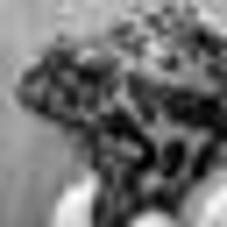

True Label: Real
Predicted Label: Real


In [19]:
# Take one image from the test data, show it, and display the label and prediction
sample_index = 984 # You can change this index to display a different image

sample_image_path = image_paths_test[sample_index]
true_label = y_test[sample_index]

# Convert predicted_label to a scalar if it's a numpy array
predicted_label = y_pred[sample_index]
if isinstance(predicted_label, np.ndarray):
    predicted_label = predicted_label.item()

# Convert label numbers to human-readable labels
label_map = {0: 'Fake', 1: 'Real'}
true_label_text = label_map[true_label]
predicted_label_text = label_map[predicted_label]

# Display the image
display(IPImage(filename=sample_image_path))

# Print the true label and predicted label
print(f"True Label: {true_label_text}")
print(f"Predicted Label: {predicted_label_text}")


In [2]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist

import autokeras as ak




2024-09-04 17:41:45.118597: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-04 17:41:45.139475: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-04 17:41:45.445546: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [1]:
!pip install autokeras

In [8]:
!pip install pillow

  Using cached pillow-10.4.0-cp39-cp39-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
Using cached pillow-10.4.0-cp39-cp39-manylinux_2_28_x86_64.whl (4.5 MB)


In [2]:
import tensorflow as tf
from tensorflow.python.compiler.tensorrt import trt_convert

try:
    print("TensorRT is available in TensorFlow.")
    print(trt_convert)
except ImportError:
    print("TensorRT is not available in TensorFlow.")



TensorRT is available in TensorFlow.
<module 'tensorflow.python.compiler.tensorrt.trt_convert' from '/home/michael/miniconda3/envs/autoKeras/lib/python3.9/site-packages/tensorflow/python/compiler/tensorrt/trt_convert.py'>
